In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10     
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import cv2
import glob   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
!pip install opencv-python

In [9]:
image = cv2.imread('/kaggle/input/chest-xray-images/chest_xray/NORMAL/NORMAL-1003233-0001.jpeg',cv2.IMREAD_GRAYSCALE)

In [10]:
image.shape 

(2476, 2572)

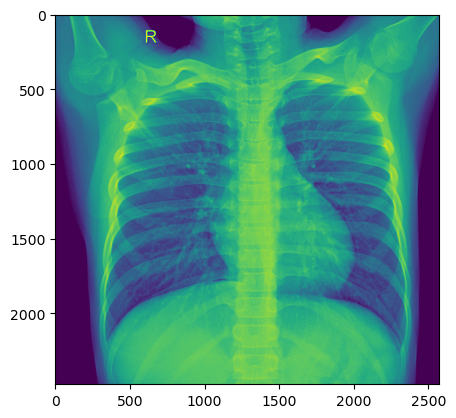

In [11]:
plt.imshow(image) 

In [1]:
import glob
import librosa     
import numpy as np
import cv2 
normal_xrays = glob.glob('/kaggle/input/chest-xray-images/chest_xray/NORMAL/*.jpeg')
pneumonia_xrays = glob.glob('/kaggle/input/chest-xray-images/chest_xray/PNEUMONIA/*.jpeg')

data = []  
labels = []

image_size=(64,64) 

for i in normal_xrays:  
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)     

for i in pneumonia_xrays:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    

#NumPy arrays are particularly useful for numerical and scientific computing tasks, 
    
X=np.array(data)  #This array represents the input features for the model.
y=np.array(labels)  #This array represents the corresponding target labels.
y.shape   #the number of labels.

(5856,)

In [6]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)), 
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])  
predicted_classes = np.argmax(predictions, axis=1)

for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
118/118 [==============================] - 4s 6ms/step - loss: 5.2979 - accuracy: 0.7515 - val_loss: 1.9641 - val_accuracy: 0.7748
Epoch 2/10
118/118 [==============================] - 1s 4ms/step - loss: 0.8467 - accuracy: 0.8940 - val_loss: 0.5728 - val_accuracy: 0.9157
Epoch 3/10
118/118 [==============================] - 1s 4ms/step - loss: 0.6558 - accuracy: 0.8900 - val_loss: 0.9355 - val_accuracy: 0.8783
Epoch 4/10
118/118 [==============================] - 1s 4ms/step - loss: 0.7209 - accuracy: 0.8818 - val_loss: 0.7212 - val_accuracy: 0.9061
Epoch 5/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4701 - accuracy: 0.9109 - val_loss: 0.6222 - val_accuracy: 0.9007
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5303 - accuracy: 0.9031 - val_loss: 1.3359 - val_accuracy: 0.8292
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.9154 - val_loss: 0.4547 - val_accuracy: 0.8869
Epoch 

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64)), 
    tf.keras.layers.Dense(units=3000, activation='relu'),
    tf.keras.layers.Dense(units=2000, activation='relu'),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(units=500, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.1,            # Reduce learning rate by a factor of 0.1
    patience=5,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with the learning rate reduction callback
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=20, batch_size=32,callbacks=[lr_callback,checkpoint_callback,early_stopping_callback])

# Evaluate the model
best_model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = best_model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20
118/118 [==============================] - 3s 13ms/step - loss: 61.6803 - accuracy: 0.7438 - val_loss: 0.4097 - val_accuracy: 0.8687 - lr: 0.0010
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3700 - accuracy: 0.8847 - val_loss: 0.7877 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2556 - accuracy: 0.9143 - val_loss: 0.2048 - val_accuracy: 0.9328 - lr: 0.0010
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2377 - accuracy: 0.9135 - val_loss: 0.2175 - val_accuracy: 0.9210 - lr: 0.0010
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2253 - accuracy: 0.9202 - val_loss: 0.2079 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2240 - accuracy: 0.9149 - val_loss: 0.2825 - val_accuracy: 0.9157 - lr: 0.0010
Epoch 7/20
118/118 [==============================] - 1s 6ms/step -